<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/(Causality)_Dynamic_Bayesian_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preperation

In [0]:
!pip install pgmpy
!pip install graphviz
# !pip install causality
# !pip instal causalinference

     |████████████████████████████████| 296kB 2.8MB/s 
     |████████████████████████████████| 1.3MB 41.5MB/s 
ERROR: scikit-image 0.15.0 has requirement networkx>=2.0, but you'll have networkx 1.11 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [0]:
import pandas as pd
import dask.dataframe as dd #for parallel processing
import numpy as np
from google.colab import files
import glob

#Takes in a 1D array and makes subsets of the array, returning a matrix
#Chunk size - how big each subset of the array will be
#numFiles - defines the columns
def getMatrix(array, chunkSize, numFiles):
  low = 0
  matrix = []
  for i in range(0, numFiles):
    matrix.append(array[low:low+chunkSize])
    low = low + chunkSize
  return np.transpose(matrix)


files.upload() #Upload Files from local directory

filelist = glob.glob('eof_ts*') #get all files starting with eof

print(filelist)

#reading in files
df = dd.read_csv(filelist, names=["Initial"]) #use parallel processing to read in all the files (much faster)
df = df.compute() #create dataframe

#Dask reads in all the data into a 2D array, storing all the values in their own 1D arrays. Ex. [ [21], [23], [59] ....]
#Here I am extracting the data and putting it all in a 1D array
temp = df.values
array = []
for i in range(0, len(temp)):
  array.append(temp[i][0])
  
#set the column names  
columnNames = [filename[filename.rfind('_')+1 : len(filename)] for filename in filelist]

#To reconstruct he matrix in our desired way, call the getMatrix function  
matrix = getMatrix(array, 480, len(filelist)) #480 because we are looking at 480 months ~40 yrs

df = pd.DataFrame(matrix, columns = columnNames) #assign matrix to the dataframe

df #print dataframe


Saving eof_ts_msl-00 to eof_ts_msl-00
Saving eof_ts_msl-01 to eof_ts_msl-01
Saving eof_ts_msl-07 to eof_ts_msl-07
Saving eof_ts_msl-09 to eof_ts_msl-09
Saving eof_ts_msl-17 to eof_ts_msl-17
Saving eof_ts_msl-24 to eof_ts_msl-24
['eof_ts_msl-01', 'eof_ts_msl-17', 'eof_ts_msl-09', 'eof_ts_msl-07', 'eof_ts_msl-00', 'eof_ts_msl-24']


,msl-01,msl-17,msl-09,msl-07,msl-00,msl-24
0,-0.499200,0.173702,1.125802,0.260658,-0.667308,2.458362
1,-0.359078,-1.145565,-0.683581,0.916423,-0.592653,1.381709
2,-1.042020,0.998696,-1.071559,-0.881304,-0.579885,0.915211
3,-0.844485,-0.421462,0.439136,-0.947577,-0.600693,0.788872
4,-0.972610,0.424404,-0.573276,0.484418,-0.497346,0.133527
5,-1.497780,0.304224,-0.382764,0.375301,-0.370552,-0.446150
6,-2.333303,-1.402710,0.076015,0.053126,-0.330698,-0.027482
7,-0.509094,-1.505429,-0.378653,0.166169,-0.619904,0.637518
8,-0.641116,-0.927319,-0.291093,0.317969,-0.489942,-0.271053
9,-0.157565,-0.018996,-0.861489,0.003307,-0.632057,0.816314


# Time Lag

In [0]:
def renameColumn(column, appendString):
  return column +"_"+ appendString

#take column and shift it downwards with lag = n, creating a new column
def timeLag(dataframe, variables = [], maxLag = 4, loopBack = True, replaceNaN = None): #lag in months*
  
  data = dataframe.copy() #make a copy of dataframe
  for variable in variables:
    
    columnData = pd.DataFrame(dataframe[variable]) #look at the column we want to shift

    if(loopBack):
      for i in range(1, maxLag+1):
        tempLag = np.roll(columnData , i) #cycling dataframe

        newCol = pd.DataFrame(tempLag)
        newName = renameColumn(variable, str(i))
        data[newName] = newCol
        
    else:
      for i in range(1, maxLag+1):
        tempLag = columnData.shift(i)

        newCol = pd.DataFrame(tempLag)

        #optional: replace NaN values with your own value
        if(replaceNaN is not None):
          newCol = newCol.fillna(value=replaceNaN)

        newName = renameColumn(variable, str(i))
        data[newName] = newCol
  return data


def getLag(string):
  if "_" in string:
    return str(string[string.rfind('_')+1 : len(string)])
  else:
    return str(0)
  
def withoutLag(string):
  if "_" in string:
    return str(string[0: string.rfind('_')])
  
def getLocation(string):
  if '_' in string:
    return str(string[string.rfind('-')+1 : string.rfind('_')])
  else:
    return str(string[string.rfind('-')+1 : len(string)])
  
def getCurrentNodes(columns):
  nodes = []
  for n in columns:
    if '_' not in n: nodes.append(n)
  return nodes

def isvalidPlacement(edge, alledges):
  reverseEdge = (edge[1], edge[0])
  return edge not in alledges and reverseEdge not in alledges

lagData = timeLag(df, df.columns, 4, False, None)
lagData

,msl-01,msl-17,msl-09,msl-07,msl-00,msl-24,msl-01_1,msl-01_2,msl-01_3,msl-01_4,msl-17_1,msl-17_2,msl-17_3,msl-17_4,msl-09_1,msl-09_2,msl-09_3,msl-09_4,msl-07_1,msl-07_2,msl-07_3,msl-07_4,msl-00_1,msl-00_2,msl-00_3,msl-00_4,msl-24_1,msl-24_2,msl-24_3,msl-24_4
0,-0.499200,0.173702,1.125802,0.260658,-0.667308,2.458362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.359078,-1.145565,-0.683581,0.916423,-0.592653,1.381709,-0.499200,NaN,NaN,NaN,0.173702,NaN,NaN,NaN,1.125802,NaN,NaN,NaN,0.260658,NaN,NaN,NaN,-0.667308,NaN,NaN,NaN,2.458362,NaN,NaN,NaN
2,-1.042020,0.998696,-1.071559,-0.881304,-0.579885,0.915211,-0.359078,-0.499200,NaN,NaN,-1.145565,0.173702,NaN,NaN,-0.683581,1.125802,NaN,NaN,0.916423,0.260658,NaN,NaN,-0.592653,-0.667308,NaN,NaN,1.381709,2.458362,NaN,NaN
3,-0.844485,-0.421462,0.439136,-0.947577,-0.600693,0.788872,-1.042020,-0.359078,-0.499200,NaN,0.998696,-1.145565,0.173702,NaN,-1.071559,-0.683581,1.125802,NaN,-0.881304,0.916423,0.260658,NaN,-0.579885,-0.592653,-0.667308,NaN,0.915211,1.381709,2.458362,NaN
4,-0.972610,0.424404,-0.573276,0.484418,-0.497346,0.133527,-0.844485,-1.042020,-0.359078,-0.499200,-0.421462,0.998696,-1.145565,0.173702,0.439136,-1.071559,-0.683581,1.125802,-0.947577,-0.881304,0.916423,0.260658,-0.600693,-0.579885,-0.592653,-0.667308,0.788872,0.915211,1.381709,2.458362
5,-1.497780,0.304224,-0.382764,0.375301,-0.370552,-0.446150,-0.972610,-0.844485,-1.042020,-0.359078,0.424404,-0.421462,0.998696,-1.145565,-0.573276,0.439136,-1.071559,-0.683581,0.484418,-0.947577,-0.881304,0.916423,-0.497346,-0.600693,-0.579885,-0.592653,0.133527,0.788872,0.915211,1.381709
6,-2.333303,-1.402710,0.076015,0.053126,-0.330698,-0.027482,-1.497780,-0.972610,-0.844485,-1.042020,0.304224,0.424404,-0.421462,0.998696,-0.382764,-0.573276,0.439136,-1.071559,0.375301,0.484418,-0.947577,-0.881304,-0.370552,-0.497346,-0.600693,-0.579885,-0.446150,0.133527,0.788872,0.915211
7,-0.509094,-1.505429,-0.378653,0.166169,-0.619904,0.637518,-2.333303,-1.497780,-0.972610,-0.844485,-1.402710,0.304224,0.424404,-0.421462,0.076015,-0.382764,-0.573276,0.439136,0.053126,0.375301,0.484418,-0.947577,-0.330698,-0.370552,-0.497346,-0.600693,-0.027482,-0.446150,0.133527,0.788872
8,-0.641116,-0.927319,-0.291093,0.317969,-0.489942,-0.271053,-0.509094,-2.333303,-1.497780,-0.972610,-1.505429,-1.402710,0.304224,0.424404,-0.378653,0.076015,-0.382764,-0.573276,0.166169,0.053126,0.375301,0.484418,-0.619904,-0.330698,-0.370552,-0.497346,0.637518,-0.027482,-0.446150,0.133527
9,-0.157565,-0.018996,-0.861489,0.003307,-0.632057,0.816314,-0.641116,-0.509094,-2.333303,-1.497780,-0.927319,-1.505429,-1.402710,0.304224,-0.291093,-0.378653,0.076015,-0.382764,0.317969,0.166169,0.053126,0.375301,-0.489942,-0.619904,-0.330698,-0.370552,-0.271053,0.637518,-0.027482,-0.446150


# Bin Data

For the sake of computational time, I am putting all of the variance data into **bins**. Each bin defines a set of sub ranges for that column. The variance data is assigned to each labeled bin. Ex. a value of 1.232151 can be placed in a bin labeled 2 (defining a range of values 1 - 1.3)

This approach increases the state counts of each variable and allows for faster computation. 

To decompose the bins, the second value returns the defined subranges

In [0]:
def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

#returns a dataframe as well as the bin information for decomposition purposes
def convertToBins(dataframe, amountOfBins, columnSet = ''):
  data = dataframe
  columns = list(data) 
  binInfo = []
  if(not columnSet):
    for i in columns: 
      maximum = data[i].max()
      minimum = data[i].min()
      bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
      binInfo.append((i, bins))
      for j in range(0, len(data[i])): 
        try:
          data[i][j] = int(assignBin(bins, data[i][j])) #assigning new bin based on value of data 
        except: pass
  else:
    maximum = data[columnSet].max()
    minimum = data[columnSet].min()
    bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
    binInfo.append((columnSet, bins))
    for j in range(0, len(data[columnSet])): 
      try:
        data[columnSet][j] = int(assignBin(bins, data[columnSet][j])) #assigning new bin based on value of data 
      except: pass #Leave Nan values alone
  return (data, binInfo)


binData = convertToBins(lagData, 5)
lagData = binData[0]
lagData

,msl-01,msl-17,msl-09,msl-07,msl-00,msl-24,msl-01_1,msl-01_2,msl-01_3,msl-01_4,msl-17_1,msl-17_2,msl-17_3,msl-17_4,msl-09_1,msl-09_2,msl-09_3,msl-09_4,msl-07_1,msl-07_2,msl-07_3,msl-07_4,msl-00_1,msl-00_2,msl-00_3,msl-00_4,msl-24_1,msl-24_2,msl-24_3,msl-24_4
0,2.0,2.0,3.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,2.0,3.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,1.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,NaN,NaN,3.0,4.0,NaN,NaN
3,1.0,1.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,NaN,3.0,1.0,2.0,NaN,1.0,2.0,3.0,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,3.0,3.0,4.0,NaN
4,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0
5,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0
6,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
7,2.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
8,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
9,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


# My Approach (Similar to K2 Algorithm)

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-122

https://www.immagic.com/eLibrary/ARCHIVES/GENERAL/WIKIPEDI/W120607B.pdf (What is a BIC?)

Step 1.	**Calculate initialScore**: the initial BIC score for node Y(t) (initially no parents).

Step 2.	Test each node to be the parent node of Y(t) in the set of potential parents S, for each node, **calculate the BIC score**.

Step 3.	Select the bestParents that produce a score **greater than the inital score** and create an edge

Step 4.	STOP when you have looped through all potential parents

Step 5.	Go to the next node (go back to step 1) 

Step 6. Exit when you have looped through all the nodes and their potential parents

*BAYESIAN INFERENCE TESTS TO DO*
(parent ----> child)


(INITIAL SCORE)
Checking: msl-01 (NO PARENTS)
Initial BIC Score: -648.0084593503203 



(INITIAL SCORE)
Checking: msl-17 (NO PARENTS)
Initial BIC Score: -613.0550013742572 



(INITIAL SCORE)
Checking: msl-09 (NO PARENTS)
Initial BIC Score: -589.2314125952673 

Improved Parent Node: msl-00_1 ----> msl-09
BIC Score: -580.0920573991423

Improved Parent Node: msl-00_2 ----> msl-09
BIC Score: -586.7668796558462



(INITIAL SCORE)
Checking: msl-07 (NO PARENTS)
Initial BIC Score: -569.5658612062834 

Improved Parent Node: msl-07_1 ----> msl-07
BIC Score: -532.3949316289102

Improved Parent Node: msl-07_2 ----> msl-07
BIC Score: -563.4521918957479

Improved Parent Node: msl-00_1 ----> msl-07
BIC Score: -507.04048418030993

Improved Parent Node: msl-00_2 ----> msl-07
BIC Score: -519.9471293000403

Improved Parent Node: msl-00_3 ----> msl-07
BIC Score: -530.4066972726553

Improved Parent Node: msl-00_4 ----> msl-07
BIC Score: -546.38548946

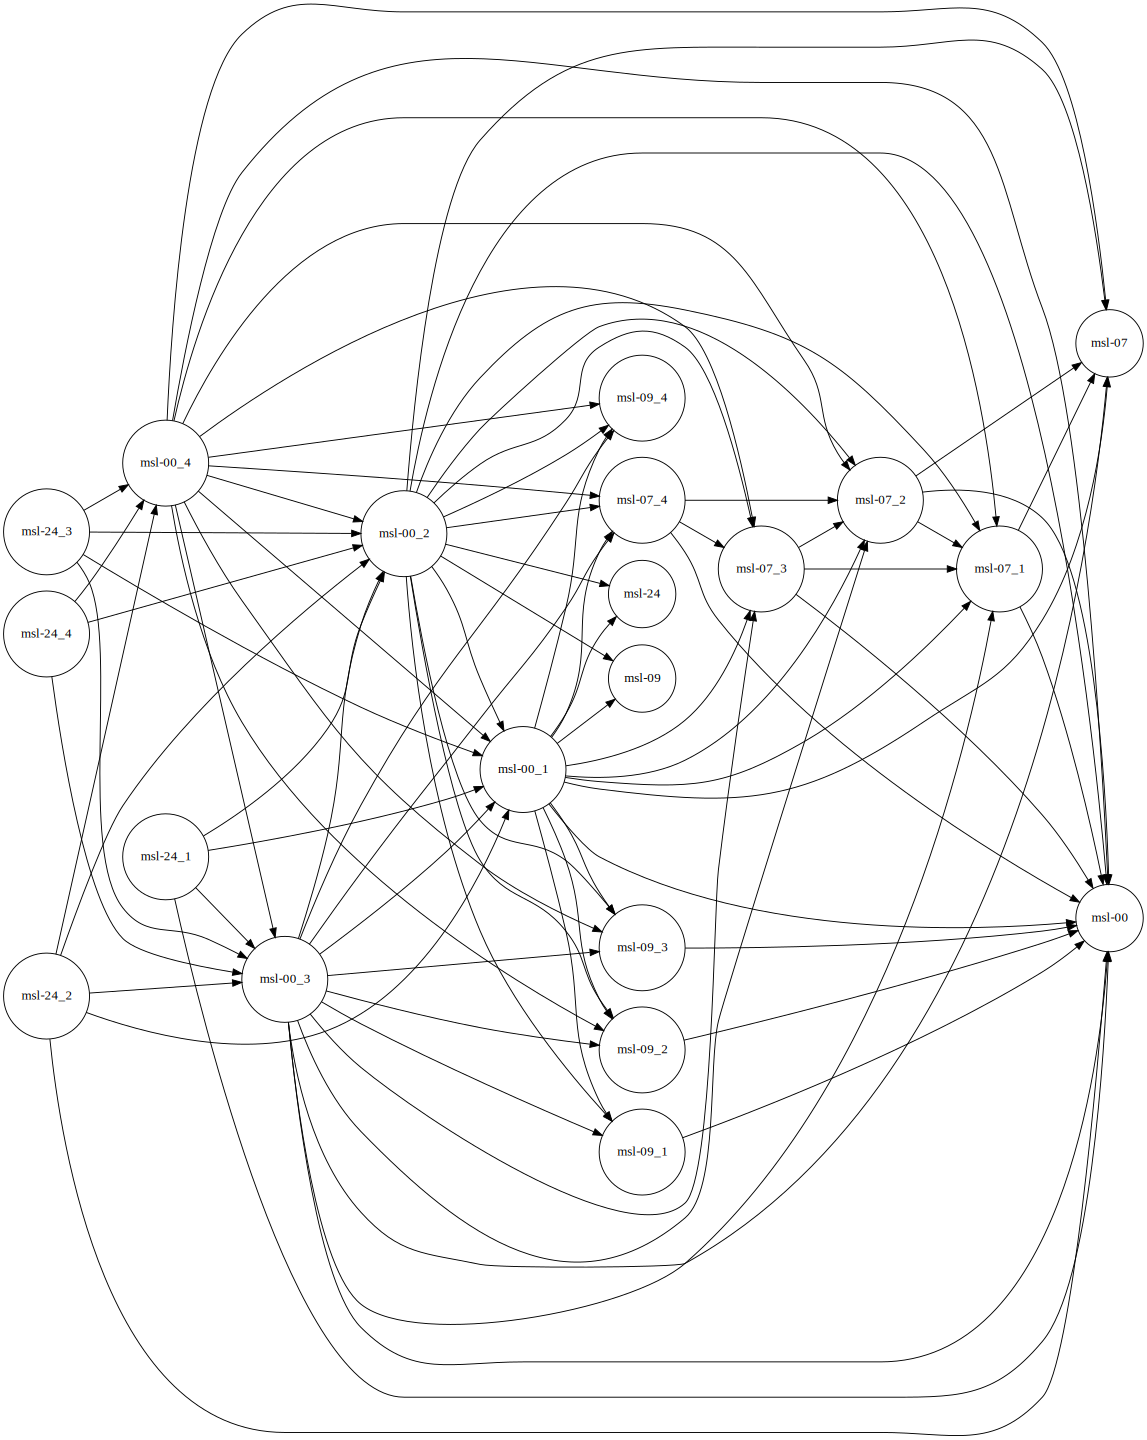

In [0]:
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.models import BayesianModel
import sys
from graphviz import Digraph
import sys

g = Digraph('Inital_Network', filename='Initial_Network') #name, filename

#input lag data
#input the maximum amount of parents a node can have (optional)
def learnStructure(lagData, maxParents = None):

  g.attr(rankdir='LR', size='20,20')
  g.attr('node', shape='circle')
  g.attr(fontsize='20')
  
  edges = []
  
  columns = lagData.columns
  initialNodes = getCurrentNodes(columns)
      
  bic = BicScore(lagData)
  
  #Loop through all nodes
  for testVariable in columns: #loop through nodes
    
    print("\n==============================================================\n")
    
    #Define all potential parents for the node
    setOfParents = []
    for var in columns: 
      if var is not testVariable and var not in initialNodes: setOfParents.append(var)
    
    initalScore = bic.local_score(testVariable, parents=[]) #instantiate initalScore which potential parents will be compared to

    print("(INITIAL SCORE)\nChecking: %s (NO PARENTS)" % (testVariable))
    print("Initial BIC Score: %s \n" % initalScore)
    
    bestParents = [] #store the parents that outpreform the inital score here
    
    parents = setOfParents.copy()
    for parent in parents: #loop through potential parents

        bicScore = bic.local_score(testVariable, parents=[parent])

        if(bicScore > initalScore): 
          edge = (parent, testVariable)
          
          if isvalidPlacement(edge, edges): #make sure edge doesn't exist and doesn't create loops
            
            bestParents.append((bicScore, parent))
            
            if(maxParents is None): #add the imporved parent if no limit is set on parents
              print("Improved Parent Node: %s ----> %s" % (parent, testVariable))
              print("BIC Score: %s\n" % bicScore)
              edges.append(edge)
              g.edge(parent, testVariable)
    
    #If a penalty was set, append the top parents found up to the limit of parents defined
    if (maxParents != None): 
      bestParents.sort(reverse = True) #scores sorted in decending order
      counter = 0 #penalty counter for maxParent
      for topParent in bestParents:
        edge = (topParent[1], testVariable)
        print("Improved Parent Node: %s ----> %s" % (topParent[1], testVariable))
        print("BIC Score: %s\n" % topParent[0])
        edges.append(edge)
        g.edge(topParent[1], testVariable)
        counter += 1
        if(counter >= maxParents): break

  g.view()
  return edges

      
print("*BAYESIAN INFERENCE TESTS TO DO*\n(parent ----> child)")

edges = learnStructure(lagData)
g

# K2 Algorithm Approach with BIC scoring

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-122

Step 1.	**Calculate initialScore**: the initial BIC score for node Y(t) (initially no parents).

Step 2.	Test each node to be the parent node of Y(t) in the set of potential parents S, for each node, calculate the BIC score.

Step 3.	Select the best parent node (**bestNode**) which gives the highest score: **newScore**.

Step 4.	compare newScore to the initialScore, if smaller then **STOP**, else add an arc from bestNode to the node Y(t) .

Step 5.	change **initialScore to newScore**.

Step 6.	remove bestNode from set S.

Step 7.	go back to step 2



---

The goal here is to find the best set of parents for a node

My approach was finding all the parents that outpreformed the inital score and creating arcs independetly


In [0]:
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.models import BayesianModel
import sys
from graphviz import Digraph
import sys

g = Digraph('Start_Network_', filename='Start_Network') #name, filename
def learnStructure(lagData):
  
  g.attr(rankdir='LR', size='20,15')
  g.attr('node', shape='circle')
  
  edges = []
  
  columns = lagData.columns
  initialNodes = getCurrentNodes(columns)
      
  bic = BicScore(lagData)
  
  #Loop through all nodes
  for testVariable in columns: 
    
    print("\n==============================================================\n")
    
    #Define all potential parents for the node
    setOfParents = []
    for var in columns: 
      if var is not testVariable and var not in initialNodes: setOfParents.append(var)
    
    #store the inital score of the node without parents
    initalScore = bic.local_score(testVariable, parents=[])

    print("(INITIAL SCORE)\nChecking: %s (NO PARENTS)" % (testVariable))
    print("Initial BIC Score: %s \n" % initalScore)
    
    newScore = float(-sys.maxsize -1) #initalize best score to the lowest value possible
    
    bestParents = [] #store the set of best parents here
    
    currentBestParent = ''
    
    parents = setOfParents.copy()
    
    while(True): #loop until the newest set of parents is less than the inital score
      
      #Begin looping through possible parents and scoring them (finding the bestparent and setting newScore)
      for parent in parents:

        tempBestParents = bestParents.copy() #Create a test set of parent(s)
        tempBestParents.append(parent)
        
        bicScore = bic.local_score(testVariable, parents=tempBestParents)
        
#         print("Node(s): %s ----> %s" % (tempBestParents, testVariable))
#         print("BIC Score: %s\n" % bicScore)

        if(bicScore > newScore):
          newScore = bicScore
          currentBestParent = parent

      if(newScore > initalScore):
        initalScore = newScore
        bestParents.append(currentBestParent)
        print("Best Node(s): %s ----> %s" % (bestParents, testVariable))
        print("BIC Score: %s\n" % newScore)
        
        parents.remove(currentBestParent)
        
        edge = (currentBestParent, testVariable)
        if isvalidPlacement(edge, edges):
          edges.append(edge)
          g.edge(currentBestParent, testVariable)
          
      else: #terminate when newScore is no longer improved from the initial score
        break
            
  g.view()
  return edges

      
print("*BAYESIAN INFERENCE TESTS TO DO*\n(parent ----> child)")

edges = learnStructure(lagData)
g

**Issues I noticed**

When using this approach, only a maximum of one best parent was found for a node. When the next best parent was added to the set, the BIC score got worse. 

# Hill Climb Search

Using a heuristic approach to structure searching

In [0]:
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.estimators import HillClimbSearch 
from pgmpy.models import BayesianModel

g = Digraph('HillClimb_Network', filename='HillClimb_Network') #name, filename

#single edge manipulations to increase score
hc = HillClimbSearch(lagData, scoring_method=BicScore(lagData)) 


model = hc.estimate()

g.edges(model.edges())

print(model.edges())

g

# Modeling Dynamic Bayesian Network

[('msl-00_1', 'msl-09'), ('msl-00_2', 'msl-09'), ('msl-07_1', 'msl-07'), ('msl-07_2', 'msl-07'), ('msl-00_1', 'msl-07'), ('msl-00_2', 'msl-07'), ('msl-00_3', 'msl-07'), ('msl-00_4', 'msl-07'), ('msl-09_1', 'msl-00'), ('msl-09_2', 'msl-00'), ('msl-09_3', 'msl-00'), ('msl-07_1', 'msl-00'), ('msl-07_2', 'msl-00'), ('msl-07_3', 'msl-00'), ('msl-07_4', 'msl-00'), ('msl-00_1', 'msl-00'), ('msl-00_2', 'msl-00'), ('msl-00_3', 'msl-00'), ('msl-00_4', 'msl-00'), ('msl-24_1', 'msl-00'), ('msl-24_2', 'msl-00'), ('msl-00_1', 'msl-24'), ('msl-00_2', 'msl-24')]


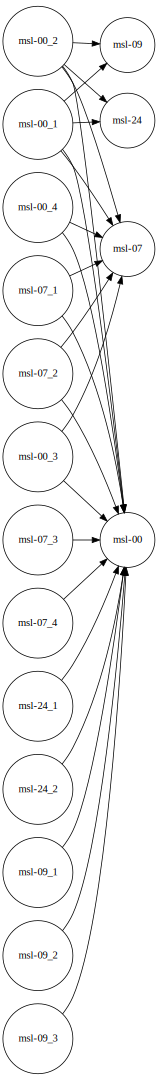

In [0]:
#Eliminate all edges that do not have connections with the current nodes
def simplifyNetwork(edges, currentNodes):
  newEdges = []
  for edge in edges:
    if edge[1] in currentNodes: newEdges.append(edge)
  return newEdges
      

sEdges = simplifyNetwork(edges, getCurrentNodes(lagData.columns))

g = Digraph('Simplified_Network', filename='Simplified_Network') #name, filename
g.attr(rankdir='LR', size='20,15')
g.attr('node', shape='circle')

g.edges(sEdges)

g.view()

print(sEdges)

g

In [0]:
#Eliminate all presistent edges (ex msl-02_2 ----> msl-02)
def reduceNetwork(sEdges):
  newEdges = []
  currentBins = []
  for edge in sEdges:
    if(edge[1] not in currentBins):
      currentBins.append(edge[1])
    if getLocation(edge[0]) != getLocation(edge[1]):
      newEdges.append(edge)
  return (newEdges, currentBins)
      
rEdges = reduceNetwork(sEdges)

rEdges

([('msl-00_1', 'msl-09'),
  ('msl-00_2', 'msl-09'),
  ('msl-00_1', 'msl-07'),
  ('msl-00_2', 'msl-07'),
  ('msl-00_3', 'msl-07'),
  ('msl-00_4', 'msl-07'),
  ('msl-09_1', 'msl-00'),
  ('msl-09_2', 'msl-00'),
  ('msl-09_3', 'msl-00'),
  ('msl-07_1', 'msl-00'),
  ('msl-07_2', 'msl-00'),
  ('msl-07_3', 'msl-00'),
  ('msl-07_4', 'msl-00'),
  ('msl-24_1', 'msl-00'),
  ('msl-24_2', 'msl-00'),
  ('msl-00_1', 'msl-24'),
  ('msl-00_2', 'msl-24')],
 ['msl-09', 'msl-07', 'msl-00', 'msl-24'])

In [0]:
def getSubPriors(subEdges):
  priors = []
  for edge in subEdges:
    if(withoutLag(edge[0]) not in priors):
      priors.append(withoutLag(edge[0]))
  return sorted(priors)

#divides the priors with their respective posteriors and calculates the average lag given the prior node indicies
def calculateLags(edges, currentBins):
  dynamicEdges = []

  for cbin in currentBins:

    lagSum = 0
    lagsFound = 0
    
    subEdges = []
    for edge in edges:
      
      if edge[1] == cbin:
        subEdges.append((edge[0], cbin))
        

    subPriors = getSubPriors(subEdges)

    for element in subPriors:
      startPrior = element
      lagSum = 0
      lagsFound = 0
      
      
      for edge in subEdges:
        if withoutLag(edge[0]) == startPrior:
          print(edge[0], edge[1])
          lagSum += int(getLag(edge[0]))
          lagsFound += 1
      
          
      print("_______________________")  
      lagAverage = int(lagSum / lagsFound)
      print("Lag Average: ", lagAverage)
      dynamicEdges.append((element, edge[1], lagAverage))
      print("_______________________\n")
      
        
    print("\n====================================================\n")

  return sorted(dynamicEdges)

dynamicEdges = calculateLags(rEdges[0], rEdges[1])


msl-00_1 msl-09
msl-00_2 msl-09
_______________________
Lag Average:  1
_______________________



msl-00_1 msl-07
msl-00_2 msl-07
msl-00_3 msl-07
msl-00_4 msl-07
_______________________
Lag Average:  2
_______________________



msl-07_1 msl-00
msl-07_2 msl-00
msl-07_3 msl-00
msl-07_4 msl-00
_______________________
Lag Average:  2
_______________________

msl-09_1 msl-00
msl-09_2 msl-00
msl-09_3 msl-00
_______________________
Lag Average:  2
_______________________

msl-24_1 msl-00
msl-24_2 msl-00
_______________________
Lag Average:  1
_______________________



msl-00_1 msl-24
msl-00_2 msl-24
_______________________
Lag Average:  1
_______________________





[('msl-00', 'msl-07'), ('msl-00', 'msl-09'), ('msl-00', 'msl-24'), ('msl-07', 'msl-00'), ('msl-09', 'msl-00'), ('msl-24', 'msl-00')]


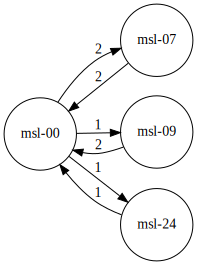

In [0]:
dynamicEdges
g = Digraph('Dynamic_Network', filename='Final_Network') #name, filename
g.attr(rankdir='LR', size='15,15')
g.attr('node', shape='circle')
g.attr(fontsize='20')

#Create connections given the edges 
finalEdges = []
for i in range(0, len(dynamicEdges)):
  parent = dynamicEdges[i][0]
  child = dynamicEdges[i][1]
  label = str(dynamicEdges[i][2])
  edge = (parent,child)
  
#   if(isvalidPlacement(edge, finalEdges)):
  finalEdges.append(edge)
  g.edge(parent, child, label=label)
    
print(finalEdges)    
g.view()
g

# Parameter Learning

In [0]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator


model = BayesianModel(finalEdges)

#variable, prior CPD calculation type, sample size
model.fit(lagData, estimator=BayesianEstimator, prior_type="BDeu") 

for cpd in model.get_cpds():
  print(cpd)

+-------------+---------------------+----------------------+----------------------+---------------------+----------------------+
| msl-24      | msl-24(0.0)         | msl-24(1.0)          | msl-24(2.0)          | msl-24(3.0)         | msl-24(4.0)          |
+-------------+---------------------+----------------------+----------------------+---------------------+----------------------+
| msl-00(0.0) | 0.03333333333333333 | 0.002702702702702703 | 0.024161073825503355 | 0.16874999999999998 | 0.17142857142857143  |
+-------------+---------------------+----------------------+----------------------+---------------------+----------------------+
| msl-00(1.0) | 0.03333333333333333 | 0.02972972972972973  | 0.05100671140939597  | 0.23124999999999998 | 0.17142857142857143  |
+-------------+---------------------+----------------------+----------------------+---------------------+----------------------+
| msl-00(2.0) | 0.03333333333333333 | 0.12432432432432432  | 0.44697986577181203  | 0.39791666666

# Causal Inference

Resources:

https://github.com/laurencium/Causalinference/blob/master/docs/tex/vignette.pdf

http://www.degeneratestate.org/posts/2018/Jul/10/causal-inference-with-python-part-2-causal-graphical-models/

http://www.degeneratestate.org/posts/2018/Mar/24/causal-inference-with-python-part-1-potential-outcomes/

https://github.com/jakobrunge/tigramite/blob/master/tutorials/tigramite_tutorial_basics.ipynb

**Causality Test Goals**

For each pair of nodes I will measure wheter of not the column causes the testColumn. If so I create a connection. 

In the end I create the simplified network structure: since we only care about the causality to the current time status, we can remove all the other edges and nodes that have no connection to the initial nodes (without lag).

In [0]:
import numpy
import pandas as pd
from causalinference import CausalModel


def findCauses(lagData):
  columns = lagData.columns
  causalEdges = []
  initialNodes = []
  for data in lagData.columns:
    if "_" not in data:
      initialNodes.append(data)
      
  for testColumn in columns:
    #print("Causality Testing for %s" %testColumn)
    print("\n===============================\n")
    
    for column in columns:
      
      if column is not testColumn and column not in initialNodes:
        
#         tempFrame = pd.concat([lagData[testColumn], lagData[column], lagData[withoutLag(column)]], axis=1, sort=False)
#         tempFrame = tempFrame.rename(index=str, columns={testColumn: "x", column: "y", withoutLag(column): "z"})

        print("Checking for %s can cause %s" % (column, testColumn))
       
print("*BAYESIAN INFERENCE TESTS TO DO*")
findCauses(lagData)

*BAYESIAN INFERENCE TESTS TO DO*


Checking for msl-07_1 can cause msl-07
Checking for msl-07_2 can cause msl-07
Checking for msl-07_3 can cause msl-07
Checking for si10-17_1 can cause msl-07
Checking for si10-17_2 can cause msl-07
Checking for si10-17_3 can cause msl-07
Checking for msl-09_1 can cause msl-07
Checking for msl-09_2 can cause msl-07
Checking for msl-09_3 can cause msl-07
Checking for si10-20_1 can cause msl-07
Checking for si10-20_2 can cause msl-07
Checking for si10-20_3 can cause msl-07
Checking for msl-24_1 can cause msl-07
Checking for msl-24_2 can cause msl-07
Checking for msl-24_3 can cause msl-07
Checking for si10-18_1 can cause msl-07
Checking for si10-18_2 can cause msl-07
Checking for si10-18_3 can cause msl-07


Checking for msl-07_1 can cause si10-17
Checking for msl-07_2 can cause si10-17
Checking for msl-07_3 can cause si10-17
Checking for si10-17_1 can cause si10-17
Checking for si10-17_2 can cause si10-17
Checking for si10-17_3 can cause si10-17
Checking 

In [0]:
import numpy
import pandas as pd
from causalinference import CausalModel


def findCauses(lagData):
  columns = lagData.columns
  causalEdges = []
  initialNodes = []
  
  for data in lagData.columns:
    if "_" not in data:
      initialNodes.append(data)
      
  for testColumn in columns:
    #print("Causality Testing for %s" %testColumn)
    print("\n===============================\n")
    
    for column in columns:
      
      if column is not testColumn and column not in initialNodes:
        tempFrame = pd.concat([lagData[testColumn], lagData[column], lagData[withoutLag(column)]], axis=1, sort=False)
        
        covariates = lagData.drop([column], axis=1)
        
        tempFrame = tempFrame.rename(index=str, columns={column: "x", testColumn: "y", withoutLag(column): "z"})
        
        #Measure causality between two nodes here given lag#
        try:
          #Y - observed outcomes
          #D - treatment
          #X - Matrix of covariates
          cm = CausalModel(
              Y=tempFrame.y.values, 
              D=tempFrame.x.values,
              X=tempFrame.z.values)

          cm.est_via_ols()
          print("Checking for %s can cause %s" % (column, testColumn))
          print(cm.estimates) 
        except:
          pass

lagData = timeLag(df, df.columns, 120, True, None) 
  
findCauses(lagData)



Checking for si10-18_1 can cause msl-07

Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.052      0.059     -0.869      0.385     -0.168      0.065
           ATC     -0.052      0.060     -0.872      0.383     -0.169      0.065
           ATT     -0.048      0.058     -0.834      0.404     -0.162      0.065

Checking for si10-18_2 can cause msl-07

Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.046      0.062      0.736      0.462     -0.077      0.168
           ATC      0.042      0.063      0.672      0.502     -0.081      0.166
           ATT      0.035      0.064      0.545      0.586     -0.091      0.161

Checking for si10-18_3 can cause msl-0

/usr/local/lib/python3.6/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


Checking for si10-18_3 can cause msl-09

Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.052      0.066      0.778      0.437     -0.078      0.181
           ATC      0.050      0.066      0.759      0.448     -0.080      0.181
           ATT      0.057      0.066      0.873      0.382     -0.071      0.186



Checking for msl-07_1 can cause si10-20

Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.103      0.070     -1.481      0.139     -0.239      0.033
           ATC     -0.106      0.070     -1.518      0.129     -0.242      0.031
           ATT     -0.106      0.070     -1.516      0.130     -0.242      0.031

Checking for msl-07_2 can cause si10-2

# Causality Library

Resources:

https://github.com/akelleh/causality

http://www.degeneratestate.org/posts/2018/Mar/24/causal-inference-with-python-part-1-potential-outcomes/


In [0]:
!pip install causality
!pip install networkx

[('msl-09', 'msl-00', {'marked': True, 'arrows': ['msl-09']}), ('msl-09', 'msl-24', {'marked': False, 'arrows': ['msl-24', 'msl-24', 'msl-24']}), ('msl-01', 'msl-00', {'marked': False, 'arrows': ['msl-00']}), ('msl-00', 'msl-24', {'marked': True, 'arrows': ['msl-24', 'msl-24', 'msl-24']}), ('msl-00', 'msl-07', {'marked': False, 'arrows': ['msl-00']}), ('msl-24', 'msl-07', {'marked': False, 'arrows': ['msl-24', 'msl-24', 'msl-24']}), ('msl-24', 'msl-09_1', {'marked': False, 'arrows': ['msl-24', 'msl-24', 'msl-24', 'msl-24', 'msl-09_1', 'msl-09_1']}), ('msl-24', 'msl-01_3', {'marked': False, 'arrows': ['msl-24', 'msl-24', 'msl-24', 'msl-24', 'msl-01_3']}), ('msl-09_1', 'msl-00_1', {'marked': True, 'arrows': ['msl-09_1', 'msl-09_1']}), ('msl-09_1', 'msl-24_1', {'marked': False, 'arrows': ['msl-09_1', 'msl-24_1']}), ('msl-09_2', 'msl-00_2', {'marked': True, 'arrows': ['msl-09_2']}), ('msl-09_2', 'msl-24_2', {'marked': False, 'arrows': ['msl-24_2']}), ('msl-09_3', 'msl-00_3', {'marked': Tru

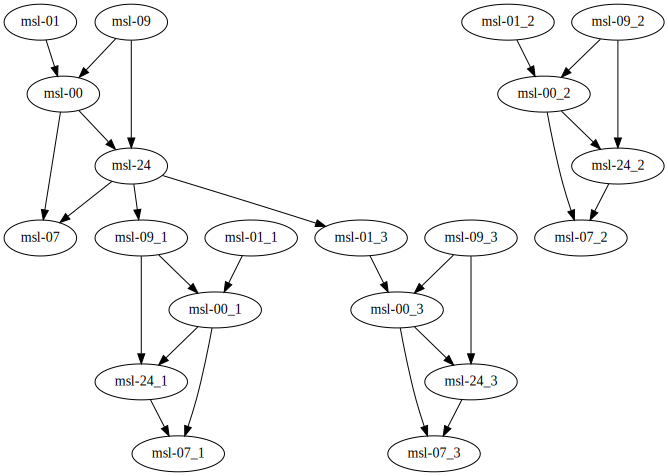

In [0]:
import numpy
import pandas as pd
from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph

# define the variable types: 'c' is 'continuous'.  The variables defined here
# are the ones the search is performed over  -- NOT all the variables defined
# in the data frame.

variable_types = {}
for i in range(0, len(lagData.columns)):
  variable_types.update({lagData.columns[i] : 'c'}) #'c' for continuous, 'o' for ordered and discrete, and 'u' for unordered and discrete.


#run the search
ic_algorithm = IC(RobustRegressionTest)

graph = ic_algorithm.search(lagData, variable_types)

print(graph.edges(data=True))


edgeData = graph.edges(data=True)

for edge in edgeData:
  if(edge[2]['marked']):
    print(edge)

edges = graph.edges()

g = Digraph('Climate', filename='Climate_Model') #name, filename
#Create connections given the edges 

for i in range(0, len(edges)):
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child)
# print(g)
# print(g.view())

g

('msl-09', 'msl-00', {'marked': True, 'arrows': ['msl-09']})
('msl-00', 'msl-24', {'marked': True, 'arrows': ['msl-24', 'msl-24', 'msl-24']})
('msl-09_1', 'msl-00_1', {'marked': True, 'arrows': ['msl-09_1', 'msl-09_1']})
('msl-09_2', 'msl-00_2', {'marked': True, 'arrows': ['msl-09_2']})
('msl-09_3', 'msl-00_3', {'marked': True, 'arrows': ['msl-09_3']})
('msl-00_3', 'msl-24_3', {'marked': True, 'arrows': ['msl-24_3']})
genuine causation: 
[('msl-09', 'msl-00', '0'), ('msl-00', 'msl-24', '0'), ('msl-09_1', 'msl-00_1', '1'), ('msl-09_2', 'msl-00_2', '2'), ('msl-09_3', 'msl-00_3', '3'), ('msl-00_3', 'msl-24_3', '3')]


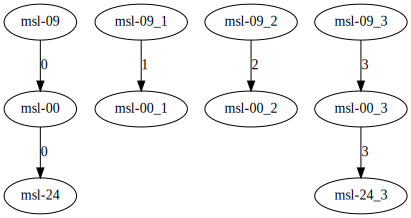

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph


edgeData = graph.edges(data=True)
causeEdge = []
for edge in edgeData:
  if(edge[2]['marked']):
    print(edge)
    causeEdge.append((edge[0], edge[1], getLag(edge[1])))

print("genuine causation: ")
print(causeEdge)


g = Digraph('Climate', filename='Climate_Model') #name, filename
#Create connections given the edges 

for i in range(0, len(edges)):
  parent = edges[i][0]
  child = edges[i][1]
  l = edges[i][2]
  g.edge(parent, child, label = l)

g

# Time Lag (loop back)

In [0]:
def renameColumn(column, appendString):
  return column +"_"+ appendString


#take column and shift it downwards with lag = n, creating a new column
def timeLag(dataframe, variables = [], lag = 120, loopBack = True, replaceNaN = None): #lag in months*
  
  data = dataframe.copy() #make a copy of dataframe
  for variable in variables:
    
    columnData = pd.DataFrame(dataframe[variable]) #look at the column we want to shift

    if(loopBack):
      
      for i in range(0, int(len(dataframe) / abs(lag))-1):

        columnData = np.roll(columnData , lag) #cycling dataframe

        newCol = pd.DataFrame(columnData)
        newName = renameColumn(variable, str(i+1))
        data[newName] = newCol
        
    else:
      for i in range(0, int(len(dataframe) / abs(lag))-1):
        columnData = columnData.shift(lag)

        newCol = pd.DataFrame(columnData)

        #optional: replace NaN values with your own value
        if(replaceNaN is not None):
          newCol = newCol.fillna(value=replaceNaN)

        newName = renameColumn(variable, str(i+1))
        data[newName] = newCol
#   data = data.reindex(sorted(data.columns), axis=1)
  return data


def getLag(string):
  if "_" in string:
    return str(string[string.rfind('_')+1 : len(string)])
  else :
    return str(0)
  
def withoutLag(string):
  if "_" in string:
    return str(string[0: string.rfind('_')])

lagData = timeLag(df, df.columns, 120, True, None)
lagData


,msl-07,si10-17,msl-09,si10-20,msl-24,si10-18,msl-07_1,msl-07_2,msl-07_3,si10-17_1,si10-17_2,si10-17_3,msl-09_1,msl-09_2,msl-09_3,si10-20_1,si10-20_2,si10-20_3,msl-24_1,msl-24_2,msl-24_3,si10-18_1,si10-18_2,si10-18_3
0,0.260658,0.960358,1.125802,0.022619,2.458362,1.381789,-0.229148,-1.991638,1.077129,0.972045,0.506312,-1.411081,-1.537627,0.132066,0.313720,1.066339,-0.560891,-0.711944,0.454437,-0.631052,-3.109436,0.923262,-0.539995,-1.873326
1,0.916423,0.586016,-0.683581,2.705268,1.381709,-0.491788,-1.070478,-1.343846,1.537636,1.303480,0.736629,-1.251822,0.741927,1.609573,-1.092821,0.209208,-0.321634,-1.654789,1.022704,-0.151947,-1.836887,0.372235,0.277570,-0.806043
2,-0.881304,0.904734,-1.071559,-0.686304,0.915211,0.295185,-1.134832,-3.077600,-0.008194,0.231871,0.066633,-1.932130,0.175710,0.773379,-1.460255,0.679698,-1.014642,-1.346879,0.174422,0.340272,-0.409381,1.307985,0.612701,-1.989451
3,-0.947577,-0.371353,0.439136,-0.355621,0.788872,0.046197,0.814252,-1.101902,-0.960661,0.698013,-0.127287,-0.107765,-0.492841,0.715269,-0.308683,1.027984,0.537077,-0.745857,-0.863587,-0.949193,0.369193,0.789122,-0.687707,-0.478881
4,0.484418,0.484028,-0.573276,-0.048683,0.133527,0.154048,-0.018418,-1.630978,-0.706631,-0.113692,0.485679,-0.950247,-0.425443,0.493212,0.882582,0.717024,0.617456,-1.406493,-1.038067,-1.403088,-1.349036,0.291529,-0.061761,-1.533497
5,0.375301,0.144092,-0.382764,0.047612,-0.446150,-0.087953,-0.414091,-0.948117,-0.700157,0.120544,-0.809146,-0.720709,0.747157,0.804047,0.651205,1.173357,-0.609640,-0.688947,0.175444,-1.286734,-0.064141,-0.587027,0.565802,-1.869300
6,0.053126,0.017726,0.076015,0.501210,-0.027482,1.254653,-0.427170,-1.282655,-0.342567,1.209828,0.926577,-1.070161,-0.381537,0.971665,1.129259,1.241152,0.931706,-0.992786,0.197639,-1.049397,-0.852992,0.872289,-0.267102,-0.748512
7,0.166169,-0.532720,-0.378653,-0.495057,0.637518,-0.322159,-0.207822,-1.035255,0.097073,1.093542,0.714543,-0.172614,-0.606324,0.997300,-0.170216,1.188816,0.030587,-0.286776,-0.591602,-0.097001,-0.260518,2.647687,-0.748890,-0.686725
8,0.317969,1.024950,-0.291093,-0.021234,-0.271053,0.205606,0.217684,-1.250673,-0.028869,2.100939,1.124642,-1.377046,0.589229,-0.159984,0.692174,1.494386,0.639650,-0.512264,-1.085956,-0.169715,-0.478260,1.512928,-0.434943,-0.519294
9,0.003307,0.789088,-0.861489,0.268508,0.816314,0.481359,-0.619978,-1.571913,-0.032918,0.118825,0.679834,-0.198406,0.735134,0.738811,0.309142,1.889656,0.143304,-0.592670,0.096539,-0.647247,-0.890701,-0.331612,0.069655,0.329033


[('msl-07', 'msl-24'), ('si10-17', 'si10-18'), ('msl-09', 'msl-07'), ('si10-20', 'si10-17'), ('msl-07_1', 'msl-24_1'), ('msl-07_2', 'msl-24_2'), ('msl-07_3', 'msl-24_3'), ('si10-17_1', 'si10-18_1'), ('si10-17_2', 'si10-18_2'), ('si10-17_3', 'si10-18_3'), ('msl-09_1', 'msl-07_1'), ('msl-09_2', 'msl-07_2'), ('msl-09_3', 'msl-07_3'), ('si10-20_1', 'si10-17_1'), ('si10-20_2', 'si10-17_2'), ('si10-20_3', 'si10-17_3')]


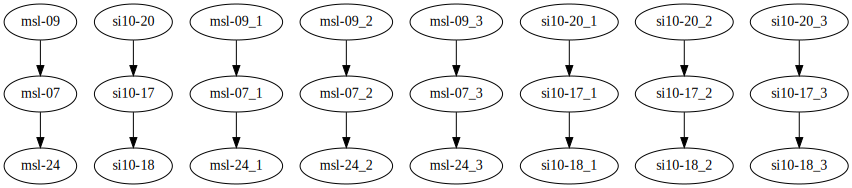

In [0]:
from pgmpy.estimators import BayesianEstimator
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import ConstraintBasedEstimator, HillClimbSearch #import scoring functions
from pgmpy.models import BayesianModel
from graphviz import Digraph


def renameColumns(columns, appendString):
  newNames = []
  for i in range(0, len(columns)):
    newNames.append(columns[i] +" ("+ appendString+")")
  return newNames

def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

#returns a dataframe as well as the bin information for decomposition purposes
def convertToBins(dataframe, amountOfBins, columnSet = ''):
  data = dataframe
  columns = list(data) 
  binInfo = []
  if(not columnSet):
    for i in columns: 
      maximum = data[i].max()
      minimum = data[i].min()
      bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
      binInfo.append((i, bins))
      for j in range(0, len(data[i])): 
        try:
          data[i][j] = int(assignBin(bins, data[i][j])) #assigning new bin based on value of data
        except:
          continue
  else:
    maximum = data[columnSet].max()
    minimum = data[columnSet].min()
    bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
    binInfo.append((columnSet, bins))
    for j in range(0, len(data[columnSet])): 
      try:
        data[columnSet][j] = int(assignBin(bins, data[columnSet][j])) #assigning new bin based on value of data 
      except:
        continue
  return (data, binInfo)


allData = convertToBins(lagData, 5)
data = allData[0]


bdeu = BdeuScore(data, equivalent_sample_size=5)

#single edge manipulations to increase score
hc = HillClimbSearch(data, scoring_method=bdeu) 

best_model = hc.estimate()
print(best_model.edges())

###Print out Bayesian Network###

edges = best_model.edges() #store connections in a variable

g = Digraph('Climate', filename='Climate_Model') #name, filename

#Create connections given the edges 
for i in range(0, len(edges)): #loop through array of tuples and extract the parents and childs
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child) #create edge from parent --> child
    
g #print network

# Time Lag (without loop back)

In [0]:
def renameColumn(column, appendString):
  return column +"_"+ appendString


#take column and shift it downwards with lag = n, creating a new column
def timeLag(dataframe, variables = [], lag = 120, loopBack = True, replaceNaN = None): #lag in months*
  
  data = dataframe.copy() #make a copy of dataframe
  for variable in variables:
    
    columnData = pd.DataFrame(dataframe[variable]) #look at the column we want to shift

    if(loopBack):
      
      for i in range(0, int(len(dataframe) / abs(lag))-1):

        columnData = np.roll(columnData , lag) #cycling dataframe

        newCol = pd.DataFrame(columnData)
        newName = renameColumn(variable, str(i+1))
        data[newName] = newCol
        
    else:
      for i in range(0, int(len(dataframe) / abs(lag))-1):
        columnData = columnData.shift(lag)

        newCol = pd.DataFrame(columnData)

        #optional: replace NaN values with your own value
        if(replaceNaN is not None):
          newCol = newCol.fillna(value=replaceNaN)

        newName = renameColumn(variable, str(i+1))
        data[newName] = newCol
#   data = data.reindex(sorted(data.columns), axis=1)
  return data


def getLag(string):
  if "_" in string:
    return str(string[string.rfind('_')+1 : len(string)])
  else :
    return str(0)
  
def withoutLag(string):
  if "_" in string:
    return str(string[0: string.rfind('_')])

lagData = timeLag(df, df.columns, 120, False, None)
lagData


,msl-07,si10-17,msl-09,si10-20,msl-24,si10-18,msl-07_1,msl-07_2,msl-07_3,si10-17_1,si10-17_2,si10-17_3,msl-09_1,msl-09_2,msl-09_3,si10-20_1,si10-20_2,si10-20_3,msl-24_1,msl-24_2,msl-24_3,si10-18_1,si10-18_2,si10-18_3
0,0.260658,0.960358,1.125802,0.022619,2.458362,1.381789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.916423,0.586016,-0.683581,2.705268,1.381709,-0.491788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.881304,0.904734,-1.071559,-0.686304,0.915211,0.295185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.947577,-0.371353,0.439136,-0.355621,0.788872,0.046197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.484418,0.484028,-0.573276,-0.048683,0.133527,0.154048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.375301,0.144092,-0.382764,0.047612,-0.446150,-0.087953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.053126,0.017726,0.076015,0.501210,-0.027482,1.254653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.166169,-0.532720,-0.378653,-0.495057,0.637518,-0.322159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.317969,1.024950,-0.291093,-0.021234,-0.271053,0.205606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.003307,0.789088,-0.861489,0.268508,0.816314,0.481359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[('msl-07', 'msl-09'), ('si10-17', 'si10-20'), ('si10-20', 'si10-20_3'), ('msl-24', 'msl-07'), ('msl-24', 'si10-20_2'), ('si10-18', 'si10-17'), ('si10-17_1', 'si10-18_1'), ('si10-17_2', 'si10-18_2'), ('si10-17_3', 'si10-18_3'), ('si10-20_1', 'si10-17_1'), ('si10-20_2', 'si10-17_2'), ('si10-20_3', 'si10-17_3')]


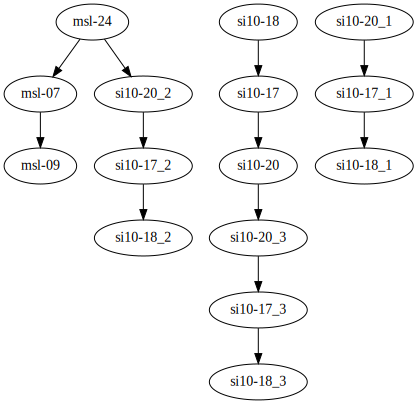

In [0]:
from pgmpy.estimators import BayesianEstimator
import pandas as pd
import numpy as np 
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.estimators import ConstraintBasedEstimator, HillClimbSearch #import scoring functions
from pgmpy.models import BayesianModel
from graphviz import Digraph


def renameColumns(columns, appendString):
  newNames = []
  for i in range(0, len(columns)):
    newNames.append(columns[i] +" ("+ appendString+")")
  return newNames

def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

#returns a dataframe as well as the bin information for decomposition purposes
def convertToBins(dataframe, amountOfBins, columnSet = ''):
  data = dataframe
  columns = list(data) 
  binInfo = []
  if(not columnSet):
    for i in columns: 
      maximum = data[i].max()
      minimum = data[i].min()
      bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
      binInfo.append((i, bins))
      for j in range(0, len(data[i])): 
        try:
          data[i][j] = int(assignBin(bins, data[i][j])) #assigning new bin based on value of data
        except:
          continue
  else:
    maximum = data[columnSet].max()
    minimum = data[columnSet].min()
    bins = createBins(minimum, maximum, amountOfBins) #Creating an array of bins for column
    binInfo.append((columnSet, bins))
    for j in range(0, len(data[columnSet])): 
      try:
        data[columnSet][j] = int(assignBin(bins, data[columnSet][j])) #assigning new bin based on value of data 
      except:
        continue
  return (data, binInfo)


allData = convertToBins(lagData, 5)
data = allData[0]


bdeu = BdeuScore(data, equivalent_sample_size=5)

#single edge manipulations to increase score
hc = HillClimbSearch(data, scoring_method=bdeu) 

best_model = hc.estimate()
print(best_model.edges())

###Print out Bayesian Network###

edges = best_model.edges() #store connections in a variable

g = Digraph('Climate', filename='Climate_Model') #name, filename

#Create connections given the edges 
for i in range(0, len(edges)): #loop through array of tuples and extract the parents and childs
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child) #create edge from parent --> child
    
g #print network